In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

| ID |Description|
| --- | --- |
| age | Age of Patient |
| sex | Sex of Patient |
| cp | Chest Pain Type  ,1: typical angina ,2: atypical angina ,3: non-anginal pain ,4: asymptomatic |
| trestbps | Resting Blood Pressure (in mm Hg on admission to the hospital) |
| chol | Serum Cholestoral in mg/dl |
| fbs | (Fasting Blood Sugar > 120 mg/dl)  (1 = true; 0 = false) |
| restecg | Resting Electrocardiographic Results 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy |
| thalach | Maximum Heart Rate Achieved |
| exang | Exercise Induced Angina|
| oldpeak | ST Depression Induced by Exercise Relative to Rest |
| slope | Slope of The Peak Exercise ST Segment ,1: upsloping, 2: flat, 3: downsloping|
| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect |
| num | Diagnosis of Heart Disease |

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
def details (df):
    table_d = pd.DataFrame(df.dtypes, columns=["data_type"])
    table_d['#missing'] = df.isnull().sum().values * 100
    table_d['%missing'] = df.isnull().sum().values / len(df)
    table_d['#unique'] = df.nunique().values 
    return table_d

In [10]:
details(df)

,data_type,#missing,%missing,#unique
age,int64,0,0.000000,41
sex,int64,0,0.000000,2
cp,int64,0,0.000000,4
trestbps,int64,0,0.000000,50
chol,int64,0,0.000000,152
fbs,int64,0,0.000000,2
restecg,int64,0,0.000000,3
thalach,int64,0,0.000000,91
exang,int64,0,0.000000,2
oldpeak,float64,0,0.000000,40


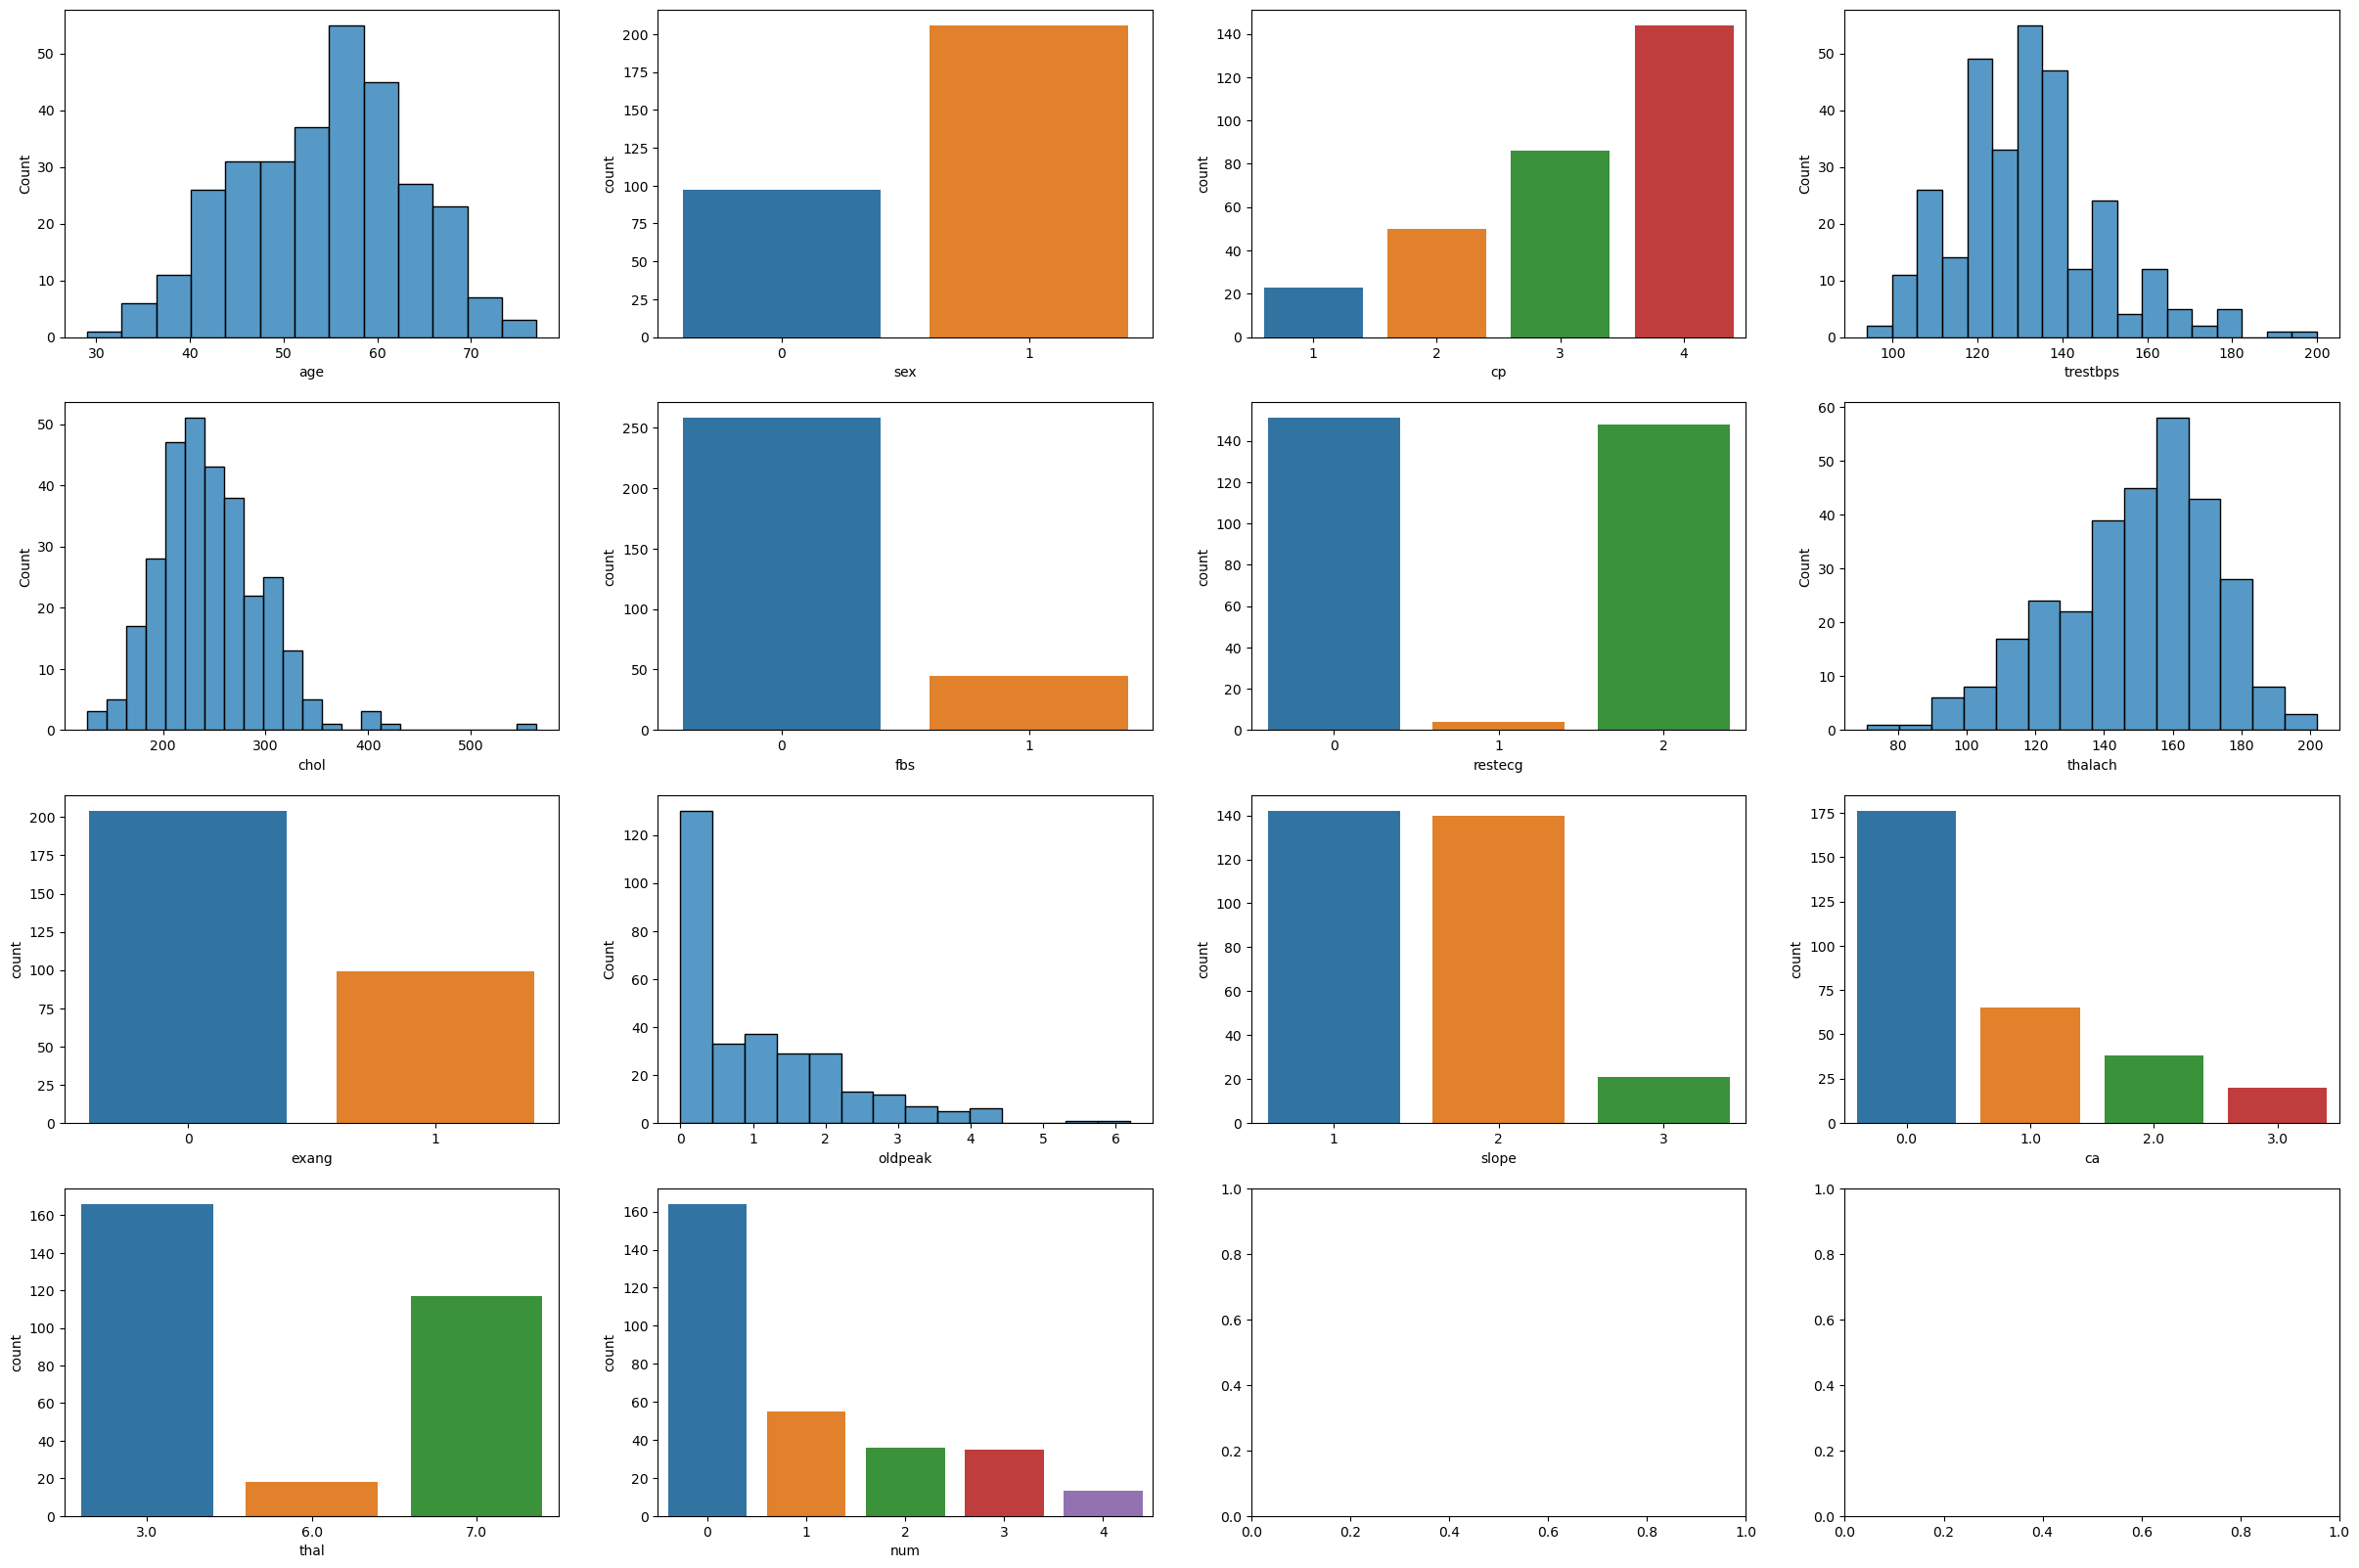

In [11]:
columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
fig, ax = plt.subplots(4, 4, figsize=(30, 20))
ax = ax.flatten()

for i, f in enumerate(columns):
    if df[f].nunique() > 10:
        sns.histplot(df, ax=ax[i], x=f)
    else:
        sns.countplot(data=df, ax=ax[i], x=f)